# Project Kaggle

In this project, you will be using XGBoost to compete in the social influence competition: https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network

We focus on this project since its data size is manageable and we can easily manipulate it. 

You need to:
1. Read and understand the competition objective
2. Download the data for this competition
3. Constructive an XGBoost model for this competition
4. Tune your XGBoost model
5. Submit your results


In [40]:
import numpy as np
import pandas as pd
import xgboost as xgb


### load data in, do training
#train = np.loadtxt('./all/train.csv', delimiter=',', skiprows=1)

train = pd.read_csv('./all/train2.csv') 
test = pd.read_csv('./all/test.csv') 

# create code to reverse A and B fields and flip label

# engineer features
# - followers/following
# - mentions received/sent
# - retweets received/sent
# - followers/posts
# - retweets received/posts
# - mentions received/posts

def followers_following(row):
    followers = row('A_follower_count')
    following = row('A_following_count')


data = train.loc[:, 'A_follower_count':]
label = train.loc[:,'Choice']



xgmat = xgb.DMatrix(data, label=label)

# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'binary:logistic'
param['min_child_weight'] = 1
param['eta'] = 0.1
param['gamma'] = 1
param['lambda'] = 3
param['max_depth'] = 6
param['verbose'] = False
param['subsample'] = 0.8
param['colsample_bytree'] = 0.8
param['eval_metric'] = 'auc'
param['silent'] = 1


In [35]:
cv_result = xgb.cv(dtrain = xgmat, nfold=5, params=param, num_boost_round=500)

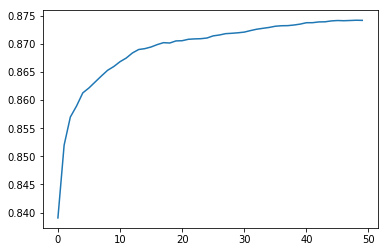

In [34]:
%matplotlib inline
cv_result['test-auc-mean'].plot()

In [38]:
model = xgb.train(dtrain = xgmat, params=param, num_boost_round=50)

In [41]:
preds = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)

In [42]:
df_submission = pd.DataFrame({'Id':range(1,len(preds)+1), 'Choice':preds})
df_submission.to_csv('./all/submission.csv', index=False)